In [2]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [3]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [7]:
# copy demo into current directory
ac.copydemo('pd1')

# start AUTO with runner object
runner = ra.runAUTO()

pgm = "pd1"
print("\nDemo %s is started"%pgm)
print("\n%s : first run : time integration towards stationary state"%pgm)
r1 = ac.run(e=pgm,c=pgm,runner=runner)
ac.save(r1,'1')

print("\n%s : second run : continuation of stationary state"%pgm)
r2 = ac.run(r1,IPS=17,ICP=[1],NTST=20,NMX=100,RL1=50,NPR=25,DS=0.1,DSMAX=0.5,runner=runner)
ac.save(r2,'2')

Copying demo pd1 ... done

Demo pd1 is started

pd1 : first run : time integration towards stationary state
gfortran -fopenmp -O -c pd1.f90 -o pd1.o
gfortran -fopenmp -O pd1.o -o pd1.exe /auto/lib/*.o
Starting pd1 ...

  BR    PT  TY  LAB      TIME        L2-NORM       MAX U(1)   
   1     1  EP    1   0.00000E+00   7.07107E-01   1.00000E+00
   1    50        2   2.29809E+00   8.80106E-01   9.97553E-01
   1   100        3   4.79305E+00   9.32012E-01   9.99496E-01
   1   150        4   7.29294E+00   9.38955E-01   9.99948E-01
   1   200        5   9.79295E+00   9.39752E-01   1.00004E+00
   1   205  UZ    6   1.00000E+01   9.39770E-01   1.00016E+00

 Total Time    0.136E+00
pd1 ... done
Saving to b.1, s.1, and d.1 ... done

pd1 : second run : continuation of stationary state
Starting pd1 ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)   
   1    25        7   6.45158E+00   9.76756E-01   1.00001E+00
   1    50        8   1.89456E+01   9.86502E-01   1.00000E+00
   1    75  

Created plot


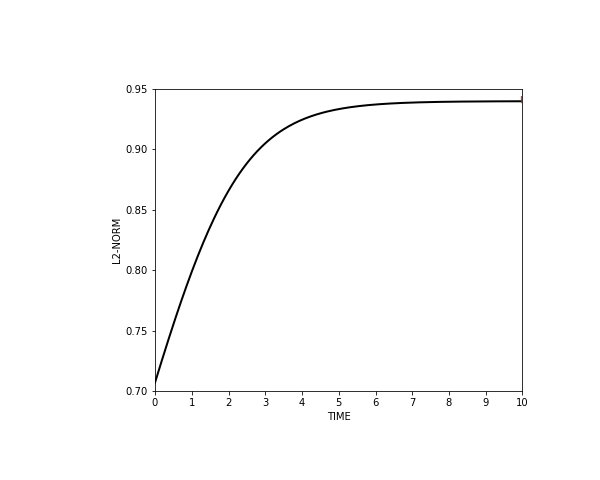

Created plot


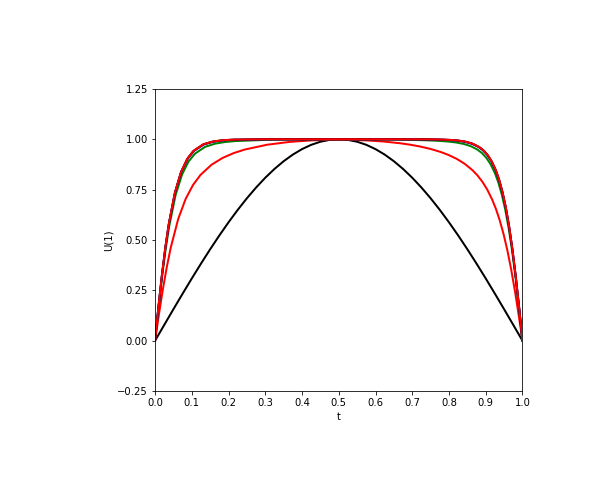

In [13]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('1')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

# plot some solutions
p = ac.plot('1')
p.config(grid=False)
p.config(type='solution')
p.config(label=list(range(1,7)))
p.savefig('b.png')
display(Image.open('b.png'))

In [14]:
# clean up files

ac.delete('1')
ac.delete('2')
ac.clean()

Deleting b.1 ... done
Deleting s.1 ... done
Deleting d.1 ... done
Deleting b.2 ... done
Deleting s.2 ... done
Deleting d.2 ... done
Deleting fort.* *.o *.exe *.*~ ... done
